In [30]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np

Assume that a football team has scored the following number of goals in each of the last 10 matches

goals = np.array([0, 2, 1, 1, 4, 3, 2, 1, 2, 0])

Lets assume that the number of goals follows a Poisson distribution and that a-priori we believe the number of goals for this football team follows a Gamma distribution with rate 1 and concentration 3

Complete the Tensorflow Probability code to infer the posterior value for the Poisson rate parameter (goal_rate)

In [39]:
goals = np.array([0, 2, 1, 1, 4, 3, 2, 1, 2, 0])

def log_posterior(goal_rate):
  log_likelihood = tfd.Poisson(rate=goal_rate).log_prob(goals)       #Answer 1 Question 6
  #log_likelihood = tfd.Poisson(goals).log_prob(goal_rate)       #Answer 1 Question 6  NO
 
  total_log_likelihood = tf.reduce_sum(log_likelihood)     #Answer 2 Question 6
 
  log_prior = tfd.Gamma(3.0, 1.0).log_prob(goal_rate)            #Answer 3 Question 6
 
  return total_log_likelihood + log_prior  # Answer 4 Question 6
 


In [40]:
@tf.function
def run_sampler():
    # specify the Metropolis Hastings inner kernel
    inner_kernel = tfp.mcmc.RandomWalkMetropolis(log_posterior)    #ANSWER

    # we need to keep the rate > 0 so apply an exponential bijector
    kernel = tfp.mcmc.TransformedTransitionKernel(inner_kernel, tfp.bijectors.Exp())   #ANSWER

    # now we can run the actual MCMC chain
    samples, kernels_results = tfp.mcmc.sample_chain(num_results=2000,
                                                    current_state=0.5,
                                                    kernel=kernel,
                                                    num_burnin_steps=50)

    return samples

In [41]:
# run the sampler
s = run_sampler()
print(s)

/opt/conda/lib/python3.8/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


tf.Tensor([1.4076672 1.4076672 1.4076672 ... 1.6780802 1.6780802 1.6780802], shape=(2000,), dtype=float32)


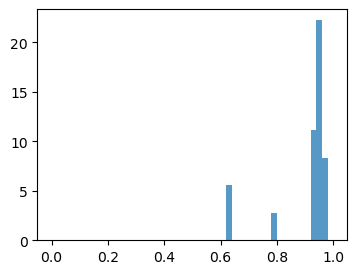

In [42]:
# plot the posterior density from the samples
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
hist = plt.hist(s.numpy(),bins=50,range=(0,1),density=True,alpha=0.75)